<a href="https://colab.research.google.com/github/OlekSmial/KLASTROWANIE-DANYCH/blob/main/PRACA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Wczytanie danych
df = pd.read_csv('data-final2.csv', sep='\t')

In [ ]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17.0,2.0,KE,1.0,38.0


In [ ]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,102304.000000,102304.000000,102304.000000,102304.000000,102304.000000,102304.000000,102304.000000,102304.000000,102304.000000,102304.000000,...,1.023040e+05,1.023040e+05,1.023040e+05,1.023040e+05,102306.000000,102306.000000,1.023060e+05,1.023030e+05,1.023060e+05,102306.000000
mean,2.661831,2.802510,3.302979,3.151187,3.260557,2.472103,2.792902,3.424881,2.988065,3.577670,...,6.543072e+03,4.552811e+03,5.615026e+03,3.736670e+03,1179.791928,827.916926,6.248778e+02,5.980269e+02,1.104158e+03,10.831857
std,1.252563,1.325347,1.209689,1.237007,1.275453,1.244262,1.389991,1.272139,1.346140,1.305892,...,4.175928e+05,4.638146e+04,1.396725e+05,9.652194e+04,533.580552,185.741582,2.038476e+04,1.724409e+04,6.248179e+04,38.418888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.169400e+04,-4.847000e+03,-9.598600e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,2.284000e+03,2.153000e+03,2.334750e+03,1.481000e+03,768.000000,732.000000,4.000000e+00,1.690000e+02,9.000000e+00,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,3.198000e+03,3.050000e+03,3.278000e+03,2.173000e+03,1366.000000,768.000000,9.000000e+00,2.180000e+02,1.300000e+01,1.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,4.656000e+03,4.411000e+03,4.733000e+03,3.302000e+03,1440.000000,960.000000,2.700000e+01,2.980000e+02,1.800000e+01,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.322412e+08,7.230163e+06,3.641350e+07,3.019457e+07,5760.000000,2562.000000,4.016892e+06,4.987930e+06,1.227570e+07,429.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102307 entries, 0 to 102306
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(106), object(4)
memory usage: 85.9+ MB


In [ ]:
# 2. Zostawiamy tylko unikalnych użytkowników tak bylo napisane w pliku
df = df[df['IPC'] == 1]

In [ ]:
missing = df.isnull().sum()
print("Braki danych:\n", missing[missing > 0])

Braki danych:
 EXT1          1
EXT2          1
EXT3          1
EXT4          1
EXT5          1
             ..
OPN8_E        1
OPN9_E        1
OPN10_E       1
testelapse    1
country       7
Length: 102, dtype: int64


Będe operował tylko po wynikach testu

In [ ]:
big5_cols = [col for col in df.columns if any(trait in col for trait in ['EXT', 'AGR', 'CSN', 'EST', 'OPN']) and not col.endswith('_E')]
df_big5 = df[big5_cols]

In [ ]:
print(df_big5.describe())

               EXT1          EXT2          EXT3          EXT4          EXT5  \
count  72897.000000  72897.000000  72897.000000  72897.000000  72897.000000   
mean       2.595676      2.858856      3.238419      3.203397      3.209789   
std        1.236533      1.323201      1.209984      1.229938      1.280471   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      2.000000      2.000000      2.000000      2.000000   
50%        3.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

               EXT6          EXT7          EXT8          EXT9         EXT10  \
count  72897.000000  72897.000000  72897.000000  72897.000000  72897.000000   
mean       2.496056      2.726573      3.456397      2.962879      3.618352   
std        1.250379      1.377786      1.266591    

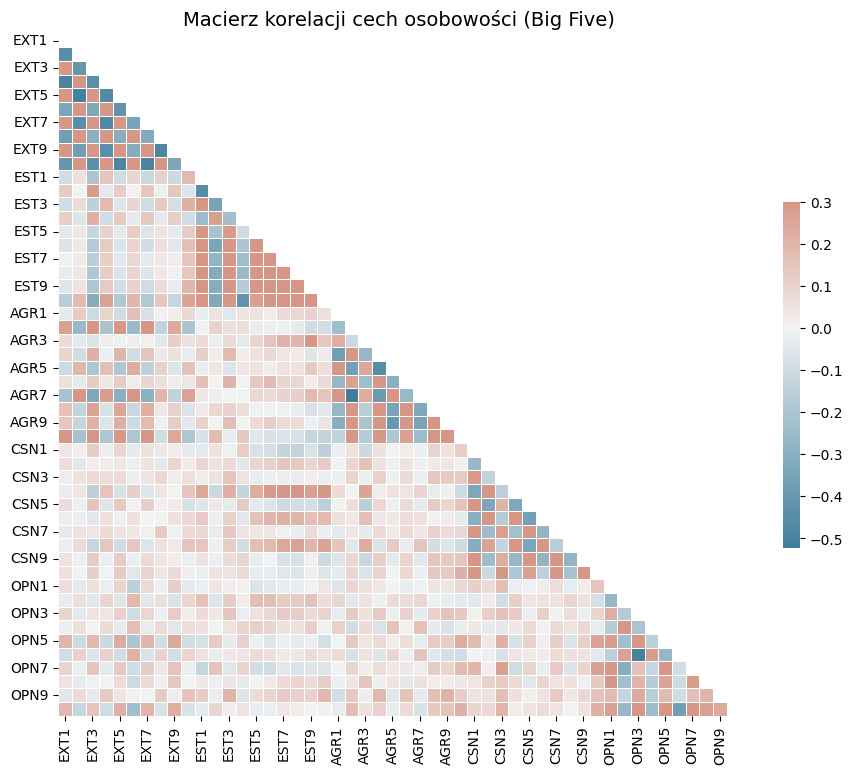

In [ ]:
corr = df_big5.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # macierz nie zduplikowana mam tylko dolna część kwadratu
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3, center=0,
    square=True, linewidths=.5,
    cbar_kws={"shrink": .5}
    )
plt.title("Macierz korelacji cech osobowości (Big Five)", fontsize=14)
plt.show()



In [ ]:
cols = df_big5.columns

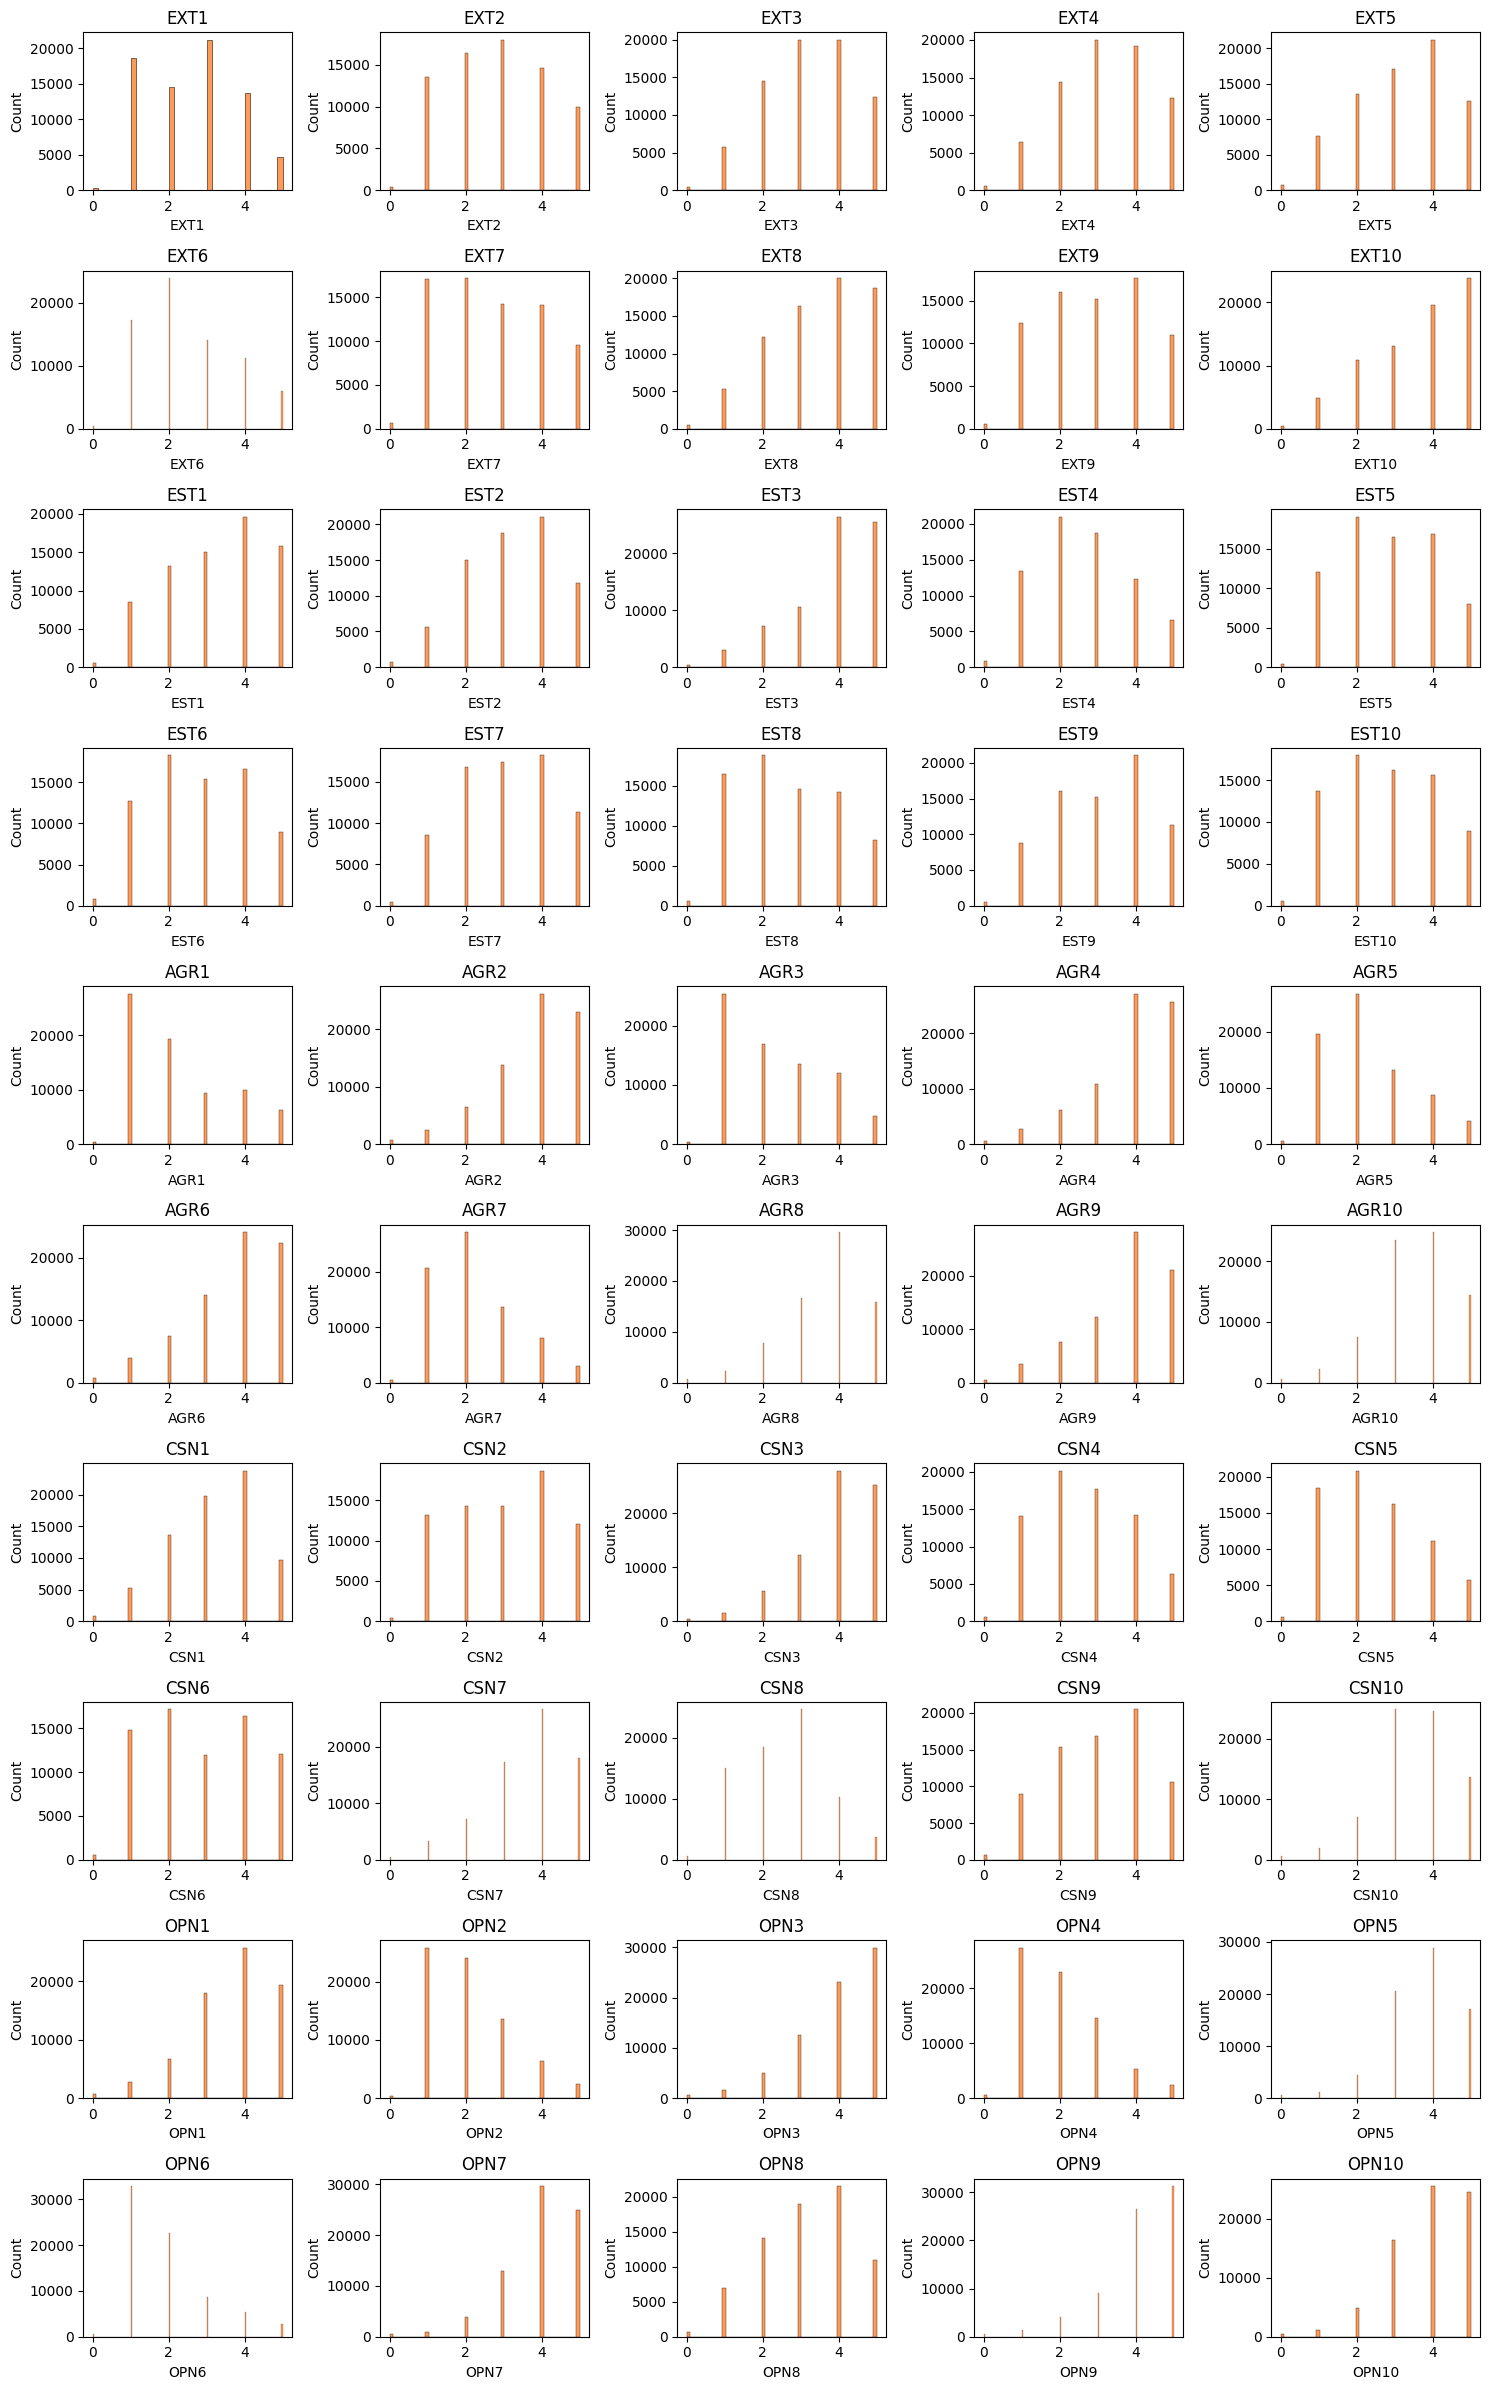

In [ ]:
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize=(15,24))
ax = ax.flatten()
for i in range(len(cols)):
  sns.histplot(df_big5[cols[i]], color = colors[0], ax = ax[i])
  ax[i].set_title(cols[i])
plt.tight_layout()
plt.show()

**SKALOWANIE**

In [ ]:
scale = StandardScaler()
scaledData = pd.DataFrame(scale.fit_transform(df_big5), columns = cols)
scaledData.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.135703,-1.404827,1.455881,-0.978427,1.398097,-1.196490,1.650069,-1.149864,0.770361,-2.024071,...,1.170470,-0.996649,0.003344,-0.967547,0.255196,-0.824425,1.020137,-0.148944,-0.098497,1.059076
1,0.326984,1.618166,-0.197044,0.647682,-0.163839,0.403036,-0.527352,1.218715,-1.458002,1.068059,...,-2.395086,-0.090438,0.003344,-0.050007,-0.755452,-0.824425,0.011553,-0.962365,0.869436,-0.866533
2,-0.481734,0.106670,0.629419,0.647682,-0.163839,-0.396727,-1.253159,-0.360338,-0.715215,1.068059,...,1.170470,-0.996649,-1.822777,-0.967547,0.255196,0.079605,1.020137,-0.148944,-0.098497,0.096271
3,-0.481734,-0.649079,-1.023507,-0.165373,0.617129,-0.396727,-0.527352,0.429188,-1.458002,0.295026,...,0.279081,-0.090438,0.916405,-0.050007,-0.755452,-0.824425,0.011553,0.664478,-1.066429,-0.866533
4,0.326984,0.106670,0.629419,-0.978427,0.617129,-0.396727,-0.527352,-0.360338,0.027573,0.295026,...,1.170470,-0.996649,0.916405,-0.967547,-0.755452,-0.824425,1.020137,0.664478,0.869436,-1.829338


**PCA**


In [ ]:
from sklearn.decomposition import PCA
# + uzupelnienie nan średnimi wartościami
scaledData = scaledData.fillna(scaledData.mean())
pca = PCA()
pca.fit_transform(scaledData)
print(pca.explained_variance_ratio_)

[0.14611747 0.0990042  0.07818004 0.06565607 0.05543642 0.04023542
 0.02651966 0.02083755 0.01919675 0.01855872 0.01763444 0.01670044
 0.01632405 0.01594767 0.01570387 0.01473965 0.0144371  0.01411906
 0.01358195 0.01310145 0.01284593 0.01271849 0.01211695 0.01204701
 0.01183365 0.01130974 0.01111778 0.01080825 0.01065374 0.0102507
 0.01009969 0.00991171 0.0097879  0.00946345 0.00887025 0.00877034
 0.00876613 0.00848249 0.00834463 0.0082003  0.00810781 0.00786829
 0.00778548 0.00758297 0.00742702 0.00728187 0.00721465 0.00695478
 0.00656681 0.00477921]


In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.85) + 1 # na 95 procent potrzebuje 43 skladników wiec lepsza opcja jest 90%
# jeszcze lepiej 85
print(d)

32


In [ ]:
pca = PCA(n_components=32)
reducedData = pca.fit_transform(scaledData)
recoveredData = pca.inverse_transform(reducedData)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(scaledData, recoveredData)
print("Średni błąd rekonstrukcji:", error)
# ale wyzszy blad rekonstrukcji

Średni błąd rekonstrukcji: 0.1422524288028137


In [ ]:
reducedData.shape # dużo

(72898, 32)

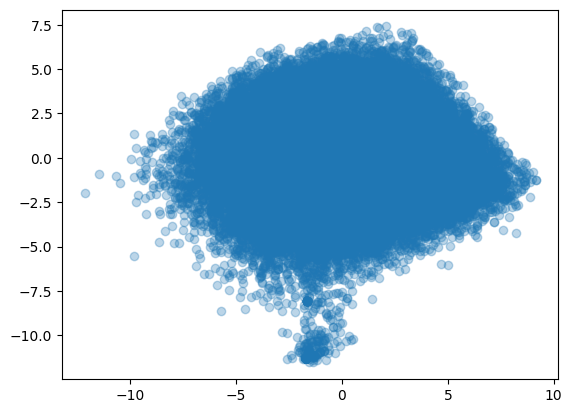

In [ ]:
plt.scatter(reducedData[:, 0], reducedData[:, 1], alpha = 0.3, label = 'samples') # 2 wymiary

Text(0.5, 0, 'PCA3')

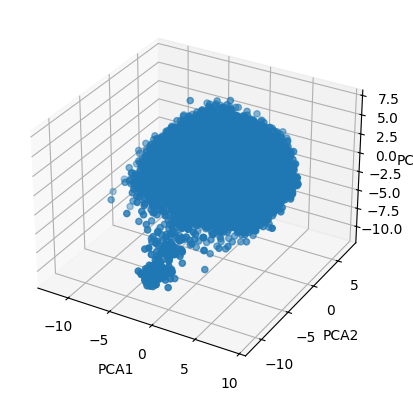

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d') # 3 WYMIARY TROCHE INACZEJ TO WYGLĄDA
ax.scatter(reducedData[:, 0], reducedData[:, 1], reducedData[:, 2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
# ciekawie ten wykres wygląda :(

**K-MEANS**

In [ ]:
# AKTUALIZACJA
# musialem zmniejszyć i zastosować MiniBatchKMeans, wcześniej liczyło mi ponad godzinę
from sklearn.cluster import MiniBatchKMeans

wcss = []
silhouette = []

for cluster in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(reducedData)
    wcss.append(kmeans.inertia_)

    from sklearn.utils import resample
    sample_data, sample_labels = resample(reducedData, kmeans.labels_, n_samples=70000, random_state=42)
    silhouette.append(silhouette_score(sample_data, sample_labels))


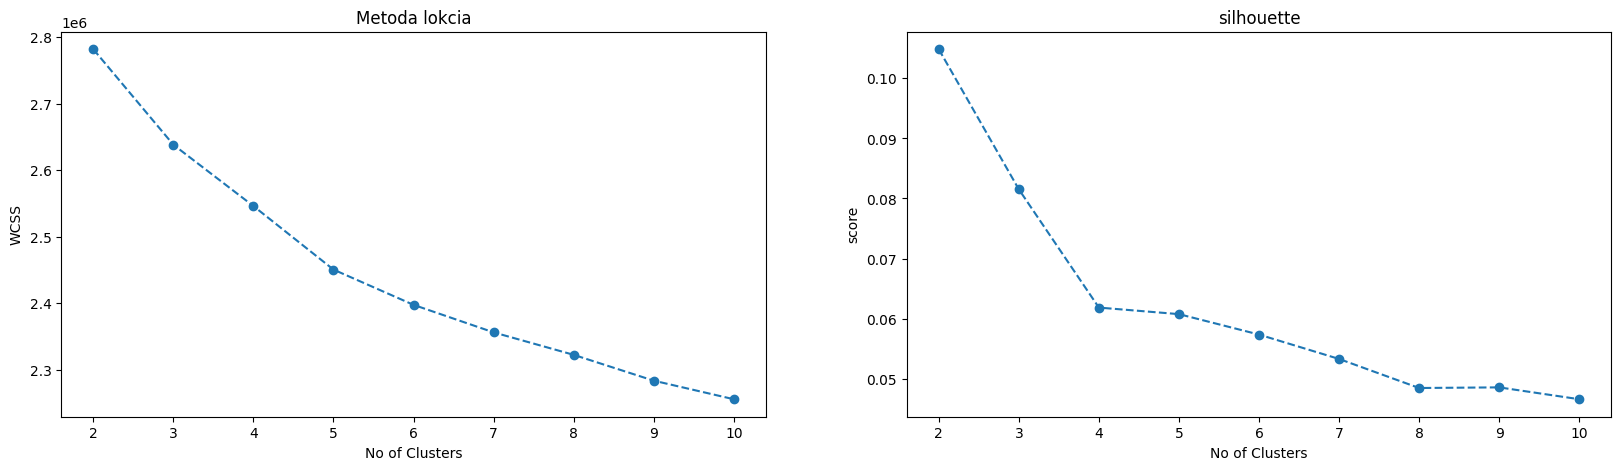

In [ ]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2,11), wcss, 'o--')
plt.title('Metoda lokcia')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2,11), silhouette, 'o--')
plt.title('silhouette')
plt.xlabel('No of Clusters')
plt.ylabel('score')

plt.show()


#  # AKTUALIZACJA teraz policzylem jeszcze raz inną metodą i metoda lokcia wskazuje na 3
# a silhouette dalej na 2
# NAJKORZYSTNIEJ WYCHODZĄ DWA KLASTRY  Ponieważ w metodzie łokcia na 2 widać zgięcie
# oraz w silhouette najwyższy score jest na 2
# MOŻE TO JEST
# INTROWERSJA VS EKSTRAWERSJA LUB COS W TYM STYLU

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42) # brak dużej roznicy pomiedzy 2/3
kmeans.fit(reducedData)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans.labels_

array([0, 1, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
kmeans.inertia_ # dużyjest ten wynik ale po sprawdzaniu  różnej ilości klastrów wcale nie ma znaczącej różnicy

2780180.0501203784

In [ ]:
kmeans.score(reducedData)

-2780180.0501203784

In [ ]:
pd.DataFrame({'clusters':kmeans.labels_})

,clusters
0,0
1,1
2,0
3,1
4,0
...,...
72893,0
72894,0
72895,0
72896,1


In [ ]:
cluster_1_data = df_big5[kmeans.labels_ == 0]
print("Statystyki opisowe dla klastra 0:\n", cluster_1_data.describe())



Statystyki opisowe dla klastra 0:
                EXT1          EXT2          EXT3          EXT4          EXT5  \
count  35397.000000  35397.000000  35397.000000  35397.000000  35397.000000   
mean       3.224454      2.199537      3.976439      2.560669      3.966664   
std        1.095013      1.114981      0.920785      1.079307      0.959289   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      1.000000      3.000000      2.000000      3.000000   
50%        3.000000      2.000000      4.000000      2.000000      4.000000   
75%        4.000000      3.000000      5.000000      3.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

               EXT6          EXT7          EXT8          EXT9         EXT10  \
count  35397.000000  35397.000000  35397.000000  35397.000000  35397.000000   
mean       1.892307      3.514959      3.000198      3.567223      2.959997   
std        0.924

In [ ]:
cluster_2_data = df_big5[kmeans.labels_ == 1]
print("Statystyki opisowe dla klastra 0:\n", cluster_2_data.describe())

Statystyki opisowe dla klastra 0:
                EXT1          EXT2          EXT3          EXT4          EXT5  \
count  37500.000000  37500.000000  37500.000000  37500.000000  37500.000000   
mean       2.002160      3.481200      2.541787      3.810080      2.495360   
std        1.055954      1.196853      1.022892      1.040724      1.125836   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      3.000000      2.000000      3.000000      2.000000   
50%        2.000000      4.000000      3.000000      4.000000      2.000000   
75%        3.000000      4.000000      3.000000      5.000000      3.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

               EXT6          EXT7          EXT8          EXT9         EXT10  \
count  37500.000000  37500.000000  37500.000000  37500.000000  37500.000000   
mean       3.065947      1.982400      3.887013      2.392427      4.239787   
std        1.250

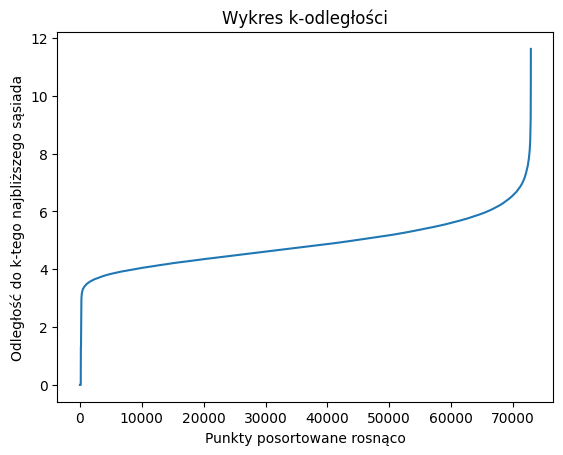

In [ ]:

from sklearn.neighbors import NearestNeighbors
k = 32  # min_samples mozna zmieniac
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(reducedData)
distances, indices = neighbors_fit.kneighbors(reducedData)

distances = np.sort(distances[:, k-1], axis=0)

plt.plot(distances)
plt.title('Wykres k-odległości')
plt.xlabel('Punkty posortowane rosnąco')
plt.ylabel('Odległość do k-tego najbliższego sąsiada')
plt.show()

# mysle ze 5/6

MODEL DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_clust = DBSCAN(eps=5.0, min_samples=32).fit(reducedData)


In [ ]:
dbscan_clust.labels_

array([0, 0, 0, ..., 0, 0, 0])

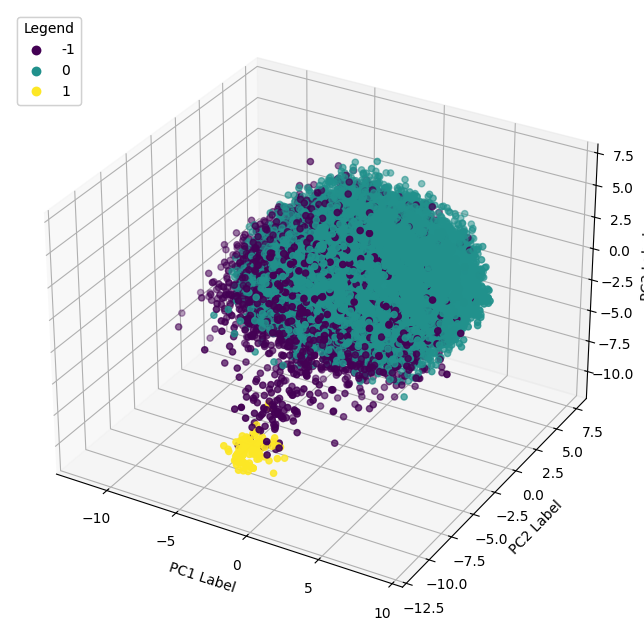

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('PC1 Label')
ax.set_ylabel('PC2 Label')
ax.set_zlabel('PC3 Label')

scatter = ax.scatter3D(reducedData[:, 0], reducedData[:, 1], reducedData[:, 2],c = dbscan_clust.labels_)

legend = ax.legend(*[scatter.legend_elements()[0],[-1,0,1,2,3]], title="Legend", loc='upper left')
ax.add_artist(legend)

plt.show()


In [ ]:
num_neg = (dbscan_clust.labels_ == -1).sum()
num_one = (dbscan_clust.labels_ == 0).sum()
num_two = (dbscan_clust.labels_ == 1).sum()
print(num_neg,"\n", num_one,"\n", num_two,"\n")

9786 
 62849 
 263 



In [ ]:
df_dbscan = pd.concat([df.reset_index(drop=True), pd.DataFrame({'dbscan_clusters': dbscan_clust.labels_})], axis=1)


In [ ]:
df_dbscan[df_dbscan['dbscan_clusters'] == 0]


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,dbscan_clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991,0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833,0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25,0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,1600.0,1000.0,4.0,196.0,3.0,1.0,SE,59.3333,18.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72892,3.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,4.0,...,1366.0,768.0,16.0,520.0,14.0,1.0,US,38.9671,-76.8619,0
72894,3.0,3.0,4.0,3.0,3.0,2.0,3.0,4.0,2.0,4.0,...,1366.0,768.0,5.0,171.0,10.0,1.0,US,38.0283,-84.4715,0
72895,4.0,1.0,5.0,1.0,5.0,2.0,5.0,2.0,4.0,1.0,...,1280.0,1024.0,5.0,198.0,17.0,1.0,US,34.1064,-117.5931,0
72896,2.0,4.0,2.0,5.0,2.0,3.0,2.0,4.0,2.0,4.0,...,1920.0,1200.0,5.0,330.0,17.0,1.0,US,38.0,-97.0,0


In [ ]:
df_dbscan[df_dbscan['dbscan_clusters'] == 1]


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,dbscan_clusters
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,375.0,667.0,26605.0,26588.0,24935.0,1.0,US,44.7457,-91.5132,1
1156,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1366.0,768.0,6.0,56.0,6.0,1.0,IN,20.0,77.0,1
1628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,375.0,667.0,6.0,8.0,6.0,1.0,US,37.2707,-76.7075,1
1827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,360.0,640.0,17.0,7.0,8.0,1.0,AU,-27.0,133.0,1
2136,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1366.0,768.0,3.0,12.0,9.0,1.0,PH,14.5833,120.9667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1684.0,947.0,28.0,226.0,6.0,1.0,US,38.3173,-88.9031,1
70851,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,360.0,640.0,13.0,63.0,45.0,1.0,ID,-6.175,106.8286,1
71924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1821.0,1024.0,17.0,181.0,8.0,1.0,US,35.4707,-97.5205,1
72133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1920.0,1080.0,4.0,281.0,10.0,1.0,US,39.9239,-75.6203,1
